In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [8]:
N=2
G=1.0

In [9]:
xi=0.1786178958448091
lambd=-0.2123418310626054
chi=-0.06626458266981849
Um2lambdau2=(1-2*lambd)/2
Um2chiplusxi=1-2*(chi+xi)

In [31]:
class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0,R0):
    self.m=m0
    self.r=np.array([x0,y0,z0])
    self.V=np.array([Vx0,Vy0,Vz0])
    self.R=R0
  def BorreFuerza(self):
    self.F=np.zeros(3)
  def SumeFuerza(self,dF):  # Pendiente
    self.dF=dF
    self.F=self.F+self.dF
  def Mueva_r(self,dt,coef):
    self.r=self.r+self.V*dt*coef
  def Mueva_V(self,dt,coef):
    self.V=self.V+self.F*coef*(dt/self.m)

In [53]:
class Colisionador:
  def CalculeFuerzaEntre(self,Planeta1,Planeta2):
    m1=Planeta1.m
    m2=Planeta2.m
    r_21=Planeta1.r-Planeta2.r
    r2=(np.linalg.norm(r_21))**2
    aux= G*m2*m1*r2**(-1.5)
    F1=r_21*aux
    Planeta1.SumeFuerza(F1)
    Planeta2.SumeFuerza((-1)*F1)
  def CalculeTodasLasFuerzas(self,Planeta):
    for i in range(N):
      Planeta[i].BorreFuerza()
    for i in range(N):
      for j in range(i):
        self.CalculeFuerzaEntre(Planeta[i],Planeta[j])

In [60]:
r=11
m1=10
m2=1
M=m1+m2
mu=m1*m2/M
x1=-m2*r/M
x2=m1*r/M
omega=np.sqrt(G*M/(r**3))
T=2*np.pi/omega
V1=omega*x1
V2=omega*x2
ttotal=int(T+1)
dt=0.1
Planeta1=Cuerpo(x0=x1,y0=0,z0=0,Vx0=0,Vy0=V1,Vz0=0,m0=m1,R0=1.0)
Planeta2=Cuerpo(x0=x2,y0=0,z0=0,Vx0=0,Vy0=V2,Vz0=0,m0=m2,R0=0.5)
Planeta=[Planeta1,Planeta2]
Newton=Colisionador()

In [61]:
Nsteps=100
xdata=np.zeros(Nsteps)
ydata=np.zeros(Nsteps)
for t in range(Nsteps):
  for i in range(Nsteps):
    xdata[i]=Planeta1.r[0]
    ydata[i]=Planeta1.r[1]
    t+=dt
    for i in range(N):
      Planeta[i].Mueva_r(dt,xi)
    Newton.CalculeTodasLasFuerzas(Planeta)
    for i in range(N):
      Planeta[i].Mueva_V(dt,Um2lambdau2)
    for i in range(N):
      Planeta[i].Mueva_r(dt,chi)
    Newton.CalculeTodasLasFuerzas(Planeta)
    for i in range(N):
      Planeta[i].Mueva_V(dt,lambd)
    for i in range(N):
      Planeta[i].Mueva_r(dt,Um2chiplusxi)
    Newton.CalculeTodasLasFuerzas(Planeta)
    for i in range(N):
      Planeta[i].Mueva_V(dt,lambd)
    for i in range(N):
      Planeta[i].Mueva_r(dt,chi)
    Newton.CalculeTodasLasFuerzas(Planeta)
    for i in range(N):
      Planeta[i].Mueva_V(dt,Um2lambdau2)
    for i in range(N):
      Planeta[i].Mueva_r(dt,xi)

Text(0.5, 1.0, 'Órbita de un planeta')

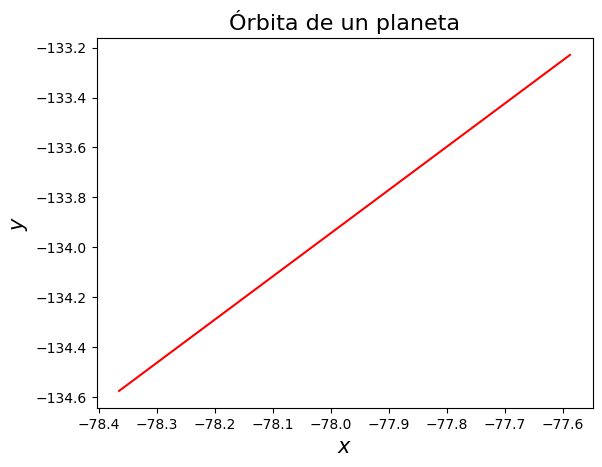

In [62]:
plt.plot(xdata,ydata, "red")
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Órbita de un planeta",size=16)

CODIGO PROFESOR:

In [ ]:
%%writefile Planeta.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

//Constantes del problema físico
const int N=2;
const double G=1.0;

//Constantes del algoritmo de integración
const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdau2=(1-2*lambda)/2;
const double Um2chiplusxi=1-2*(chi+xi);

//--------------- Declarar las clases-----------
class Cuerpo;
class Colisionador;

//--------- Declarar las interfases de las clases---------
class Cuerpo{
private:
  vector3D r,V,F; double m,R;
public:
  void Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0);
  void BorreFuerza(void){F.load(0,0,0);};// Inline
  void SumeFuerza(vector3D dF){F+=dF;};// Inline
  void Mueva_r(double dt,double coeficiente);
  void Mueva_V(double dt,double coeficiente);
  void Dibujese(void);
  double Getx(void){return r.x();}; // Inline
  double Gety(void){return r.y();}; // Inline
  friend class Colisionador;
};
class Colisionador{
private:
public:
  void CalculeTodasLasFuerzas(Cuerpo * Planetas);
  void CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2);
};

//-------Implementar las funciones de las clases------
//------- Funciones de la clase cuerpo --------
void Cuerpo::Inicie(double x0,double y0,double z0,
	      double Vx0,double Vy0,double Vz0,double m0,double R0){
  r.load(x0,y0,z0);  V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::Mueva_r(double dt,double coeficiente){
  r+=V*(coeficiente*dt);
}
void Cuerpo::Mueva_V(double dt,double coeficiente){
  V+=F*(coeficiente*dt/m);
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<r.x()<<"+"<<R<<"*cos(t),"<<r.y()<<"+"<<R<<"*sin(t)";
}
//------- Funciones de la clase Colisionador --------
void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Planeta){
  int i,j;
  //Borro las fuerzas de todos los planetas
  for(i=0;i<N;i++)
    Planeta[i]. BorreFuerza();
  //Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
  for(i=0;i<N;i++)
    for(j=0;j<i;j++)
      CalculeFuerzaEntre(Planeta[i],Planeta[j]);
}
void Colisionador::CalculeFuerzaEntre(Cuerpo & Planeta1,Cuerpo & Planeta2){
  double m1=Planeta1.m, m2=Planeta2.m;
  vector3D r21=Planeta2.r-Planeta1.r; double r2=r21.norm2();
  double aux=G*m2*m1*pow(r2,-1.5);
  vector3D F1=r21*aux;
  Planeta1.SumeFuerza(F1);  Planeta2.SumeFuerza(F1*(-1));
}
//----------- Funciones Globales -----------
//---Funciones de Animacion---
void InicieAnimacion(void){
  //  cout<<"set terminal gif animate"<<endl;
  //  cout<<"set output 'UnBalon.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-11:11]"<<endl;
  cout<<"set yrange[-11:11]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange [0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;
}
void InicieCuadro(void){
    cout<<"plot 0,0 ";
}
void TermineCuadro(void){
    cout<<endl;
}

int main(){
  double r=11,m0=10,m1=1;
  double M=m0+m1, mu=m0*m1/M;
  double x0=-m1*r/M,x1=m0*r/M;
  double omega=sqrt(G*M/(r*r*r)); double T=2*M_PI/omega;
  double V0=omega*x0, V1=omega*x1;
  double t,dt=0.1,ttotal=T;
  int Ncuadros=30000; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Planeta[N];
  Colisionador Newton;
  int i;

  InicieAnimacion();

  //INICIO
  //---------------(x0,y0,z0,Vx0,   Vy0,Vz0,m0,R0)
  Planeta[0].Inicie(x0, 0, 0,  0, 0.5*V0,  0,m0,1.0);
  Planeta[1].Inicie(x1, 0, 0,  0, 0.5*V1,  0,m1,0.5);
  //CORRO
  for(t=tdibujo=0;t<ttotal;t+=dt,tdibujo+=dt){

    if(tdibujo>tcuadro){

      InicieCuadro();
      for(i=0;i<N;i++) Planeta[i].Dibujese();
      TermineCuadro();

      tdibujo=0;
    }
    //cout<<Planeta[1].Getx()<<" "<<Planeta[1].Gety()<<endl;

    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,xi);
    Newton.CalculeTodasLasFuerzas(Planeta); for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,Um2lambdau2);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,chi);
    Newton.CalculeTodasLasFuerzas(Planeta); for(i=0;i<N;i++) Planeta[i].Mueva_V(dt,lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,Um2chiplusxi);
    Newton.CalculeTodasLasFuerzas(Planeta); for(i=0;i<N;i++)Planeta[i].Mueva_V(dt,lambda);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,chi);
    Newton.CalculeTodasLasFuerzas(Planeta); for(i=0;i<N;i++)Planeta[i].Mueva_V(dt,Um2lambdau2);
    for(i=0;i<N;i++) Planeta[i].Mueva_r(dt,xi);

  }
  return 0;
}